 # Part 1: Retrieval-Augmented Generation (RAG) Model for QA Bot
 ## Problem Statement:
 Develop a Retrieval-Augmented Generation (RAG) model for a Question Answering (QA)
 bot for a business. Use a vector database like Pinecone DB and a generative model like
 Cohere API (or any other available alternative). The QA bot should be able to retrieve
 relevant information from a dataset and generate coherent answers.
 ## Task Requirements:
 1. Implement a RAG-based model that can handle questions related to a provided
 document or dataset.
 2. Use a vector database (such as Pinecone) to store and retrieve document
 embeddings efficiently.
 3. Test the model with several queries and show how well it retrieves and generates
 accurate answers from the document.

# RAG Work Flow

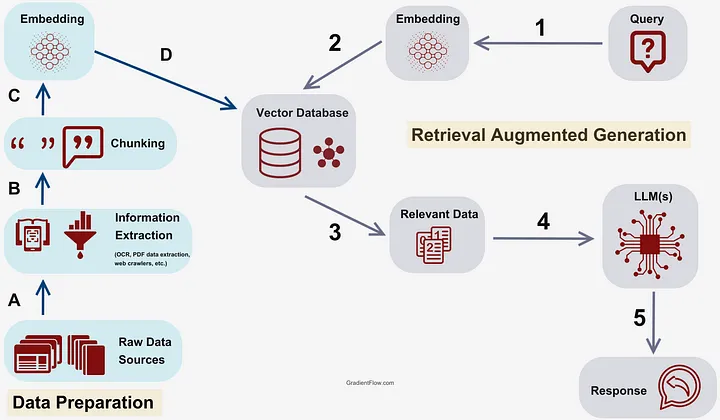

# Overview
- Model = Groq(llama-3.1-70b-versatile)
- Vector database = Faiss
- Retrieval with Langchain Framework
- UI = Gradio
- Model tracking = Langsmith
- load url with WebBaseLoader
- embeddings through huggingface api
- split documents with RecursiveCharacterTextSplitter

# Install necessary dependencies

In [1]:
!pip install --upgrade --quiet langchain_community langchain beautifulsoup4 faiss-cpu langchain-groq langchain-huggingface gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/1

# Import necessary Libraries

In [2]:
# Load docs
import os
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings
from google.colab import userdata
from langchain_community.vectorstores import FAISS
from langchain import hub
from langchain.chains import RetrievalQA
from langchain_groq import ChatGroq


# set environment of api keys
Hug_api_key=userdata.get('hug_api_key') # huggingface api
os.environ["GROQ_API_KEY"] = userdata.get("groq_api_key") # groq api
os.environ['LANGCHAIN_API_KEY']=userdata.get('LANGCHAIN_API_KEY') # langchain api

# set langsmith to trach the calls
LANGCHAIN_TRACING_V2="true"
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
LANGCHAIN_PROJECT="Rag based approach"

# Load website data
loader = WebBaseLoader("https://englishfirm.com/")
data = loader.load()

# Split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=50)
all_splits = text_splitter.split_documents(data)

# embeding initialisation
embeddings = HuggingFaceInferenceAPIEmbeddings(api_key=Hug_api_key, model_name="sentence-transformers/all-MiniLM-l6-v2")

# Store splits
vectorstore = FAISS.from_documents(documents=all_splits, embedding=embeddings)

# LLM
llm = ChatGroq(
    model="llama-3.1-70b-versatile",
    temperature=0,
    max_tokens=600,
    timeout=None,
    max_retries=2,
)


# See full prompt at https://smith.langchain.com/hub/rlm/rag-prompt
prompt = hub.pull("rlm/rag-prompt")

qa_chain = RetrievalQA.from_llm(
    llm, retriever=vectorstore.as_retriever(), prompt=prompt
)

qa_chain("What are the cources provided?")

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:5301: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  prompt = loads(json.dumps(prompt_object.manifest))
<ipython-input-2-8bc2eb7e23bc>:54: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  qa_chain("What are the cources provided?")


{'query': 'What are the cources provided?',
 'result': 'Englishfirm provides the following courses: \n1. NAATI Training (for Hindi, Nepali, and Tamil languages)\n2. PTE Classes (both online and offline)\n3. General English Classes (including intensive programs and long-term training programs)'}

In [4]:
import gradio as gr

# Define a function to handle user messages and generate responses
def respond(message, history: list[dict]):
    # Focus on the latest user message only
    query = message

    # Use the qa_chain to generate a response
    response_text = qa_chain(query)["result"]

    # Append the assistant's response to the history
    response = {"role": "assistant", "content": response_text}
    yield response

# Create a Gradio ChatInterface using the respond function
demo = gr.ChatInterface(respond, type="messages")

# Launch the Gradio interface with debugging enabled
if __name__ == "__main__":
    demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://59f0d7ac61e15a4df7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://59f0d7ac61e15a4df7.gradio.live


# Demo of working app

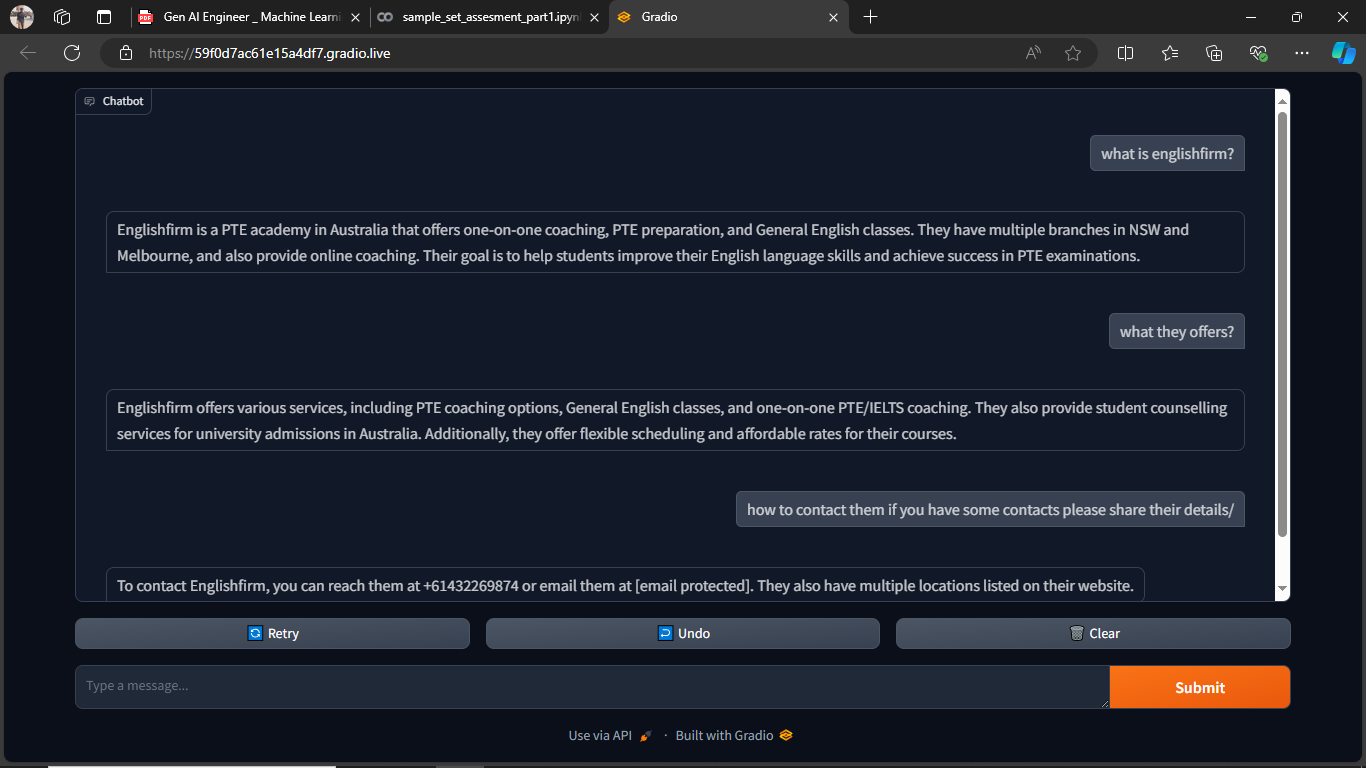

In [6]:
import os
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings
from google.colab import userdata
from langchain_community.vectorstores import FAISS
from langchain import hub
from langchain.chains import RetrievalQA
from langchain_groq import ChatGroq
import gradio as gr
import tempfile

def process_pdf(file):
  with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
    tmp_file.write(file.read())
    tmp_file_path = tmp_file.name

  loader = PyPDFLoader(tmp_file_path)
  documents = loader.load()
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
  docs = text_splitter.split_documents(documents)

  embeddings = HuggingFaceInferenceAPIEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
  db = FAISS.from_documents(docs, embeddings)

  retriever = db.as_retriever()
  qa = RetrievalQA.from_chain_type(llm=ChatGroq(), chain_type="stuff", retriever=retriever)

  def query_pdf(query):
    return qa.run(query)

  return query_pdf

iface = gr.Interface(

    fn=process_pdf,
    inputs=gr.File(label="Upload PDF"),
    outputs=gr.Textbox(label="Query the PDF"),
    title="PDF Q&A",
    description="Upload a PDF and ask questions about its content."
)

iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://bc998039e61e82b28a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1520, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b41d1b7f2ee1a9821e.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://bc998039e61e82b28a.gradio.live
